In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.utils import resample
from sklearn.cluster import KMeans

In [16]:
#we start by reading the dataset
df1 = pd.read_csv('creditcard.csv')
df1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
df1 = df1.drop('Time',1)

In [18]:
df1 = df1[~df1.duplicated()]

In [19]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
train,test = train_test_split(df1,test_size = 0.2 , random_state = 42)

In [21]:
train['Class'].value_counts()

0    220148
1       382
Name: Class, dtype: int64

In [22]:
test['Class'].value_counts()

0    55042
1       91
Name: Class, dtype: int64

In [23]:
zeros_class = train[train['Class'] == 0]
ones_class = train[train['Class'] == 1]

In [24]:
zeros_class = zeros_class.drop('Class',1)

In [25]:
zeros_class.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
82602,-0.697561,0.948635,-0.265964,0.232319,2.234194,3.852625,-0.207872,1.360338,-0.780520,-0.483250,...,0.089137,-0.041381,-0.234344,-0.225184,1.016926,0.380123,-0.203681,0.008106,0.036948,19.13
125045,1.264899,0.049540,-0.952775,-0.070600,2.065511,3.424647,-0.528821,0.854294,-0.038103,0.022971,...,-0.000144,-0.327823,-1.124423,0.106592,0.943713,0.444564,-0.678490,0.031086,0.027166,9.95
1779,-0.715606,0.513689,0.961015,-1.198394,0.583521,-0.829520,1.320615,-0.439369,0.047655,0.408184,...,0.260249,-0.127502,0.058932,-0.101983,0.020072,-0.306188,0.765075,0.049670,-0.194371,48.76
90892,-2.139310,2.097059,-0.022686,1.456046,-1.022387,-0.087631,-0.754045,1.604350,-1.025693,-0.911668,...,-0.457860,0.226124,0.268603,-0.026230,0.126653,0.009085,-0.258654,-0.702756,-0.163966,14.99
107921,-3.026331,1.801124,-1.896878,-2.520847,0.718708,3.298411,-1.318774,1.332548,-0.953841,1.280528,...,-0.349800,0.232285,-1.248408,0.180337,0.949543,0.119986,0.203583,-0.131442,-0.253182,49.99


In [26]:
zeros_class['Amount'] = np.log(zeros_class['Amount']+1)

In [27]:
#clustering the zeros to 15000 points
km = KMeans(n_clusters = 382)

In [28]:
#fitting the data
km.fit(zeros_class)

KMeans(n_clusters=382)

In [30]:
new_zeros = pd.DataFrame(km.cluster_centers_, columns = zeros_class.columns)

In [38]:
new_zeros['Class'] = np.zeros(382)

In [34]:
ones_class['Amount'] = np.log(ones_class['Amount']+1)

<ipython-input-34-6d29d6ab548f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones_class['Amount'] = np.log(ones_class['Amount']+1)


In [39]:
new_df = pd.concat([new_zeros,ones_class],0)

In [40]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.881109,-1.058645,-0.997548,-0.002331,-0.779163,-0.542343,-0.386368,-0.214808,-0.236961,0.775477,...,-0.292841,-0.505692,0.148522,0.084574,-0.246191,-0.058778,-0.013811,-0.019541,4.733770,0.0
1,-0.716423,0.894898,1.310392,-0.190481,0.098619,-0.339245,0.419477,0.219091,-0.280884,-0.129872,...,-0.153416,-0.494635,-0.029799,-0.009557,-0.217637,0.036771,0.110067,0.036604,1.839738,0.0
2,1.018543,0.160474,0.076860,1.029893,-0.219822,-0.205072,-0.193263,0.083363,0.624508,-0.724352,...,-0.058359,-0.014736,-0.099757,0.040343,0.389106,0.238547,0.043237,0.035399,3.086229,0.0
3,-1.399285,-0.549248,1.417276,0.200992,-0.822228,0.371764,-0.007368,0.287271,-1.305285,0.416397,...,-0.135678,-0.066394,0.158107,-0.020684,-0.090838,-0.235839,0.068764,-0.046763,5.086958,0.0
4,-5.775800,4.094618,-1.582641,-0.023646,-1.047348,3.648046,-5.793114,-14.533907,0.119379,-0.269764,...,3.735559,-1.298892,1.322721,-0.204937,0.044526,0.046078,0.226844,0.156258,2.835325,0.0


In [41]:
new_df['Class'].value_counts()

0.0    382
1.0    382
Name: Class, dtype: int64

In [42]:
clf = RandomForestClassifier()

In [43]:
X = new_df.drop('Class',1)
y = new_df['Class']

In [44]:
clf.fit(X,y)

RandomForestClassifier()

In [4]:
#dropping the duplicates
#df1= df1[~df1.duplicated()]
#df1['Class'].value_counts()

In [5]:
X = df1.drop('Class',1)
y = df1['Class']

In [6]:
train_x,x_test,train_y,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [7]:
df = pd.concat([train_x,train_y],1)

In [8]:
#the first 5 rows of the dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 223361 to 121958
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227845 non-null  float64
 1   V2      227845 non-null  float64
 2   V3      227845 non-null  float64
 3   V4      227845 non-null  float64
 4   V5      227845 non-null  float64
 5   V6      227845 non-null  float64
 6   V7      227845 non-null  float64
 7   V8      227845 non-null  float64
 8   V9      227845 non-null  float64
 9   V10     227845 non-null  float64
 10  V11     227845 non-null  float64
 11  V12     227845 non-null  float64
 12  V13     227845 non-null  float64
 13  V14     227845 non-null  float64
 14  V15     227845 non-null  float64
 15  V16     227845 non-null  float64
 16  V17     227845 non-null  float64
 17  V18     227845 non-null  float64
 18  V19     227845 non-null  float64
 19  V20     227845 non-null  float64
 20  V21     227845 non-null  float64
 21  V22  

df1 = df.drop('Class',1)
fig, ax = plt.subplots(figsize= (20,20))
sns.heatmap(df1.corr(), annot = True,ax = ax)

In [10]:
df['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

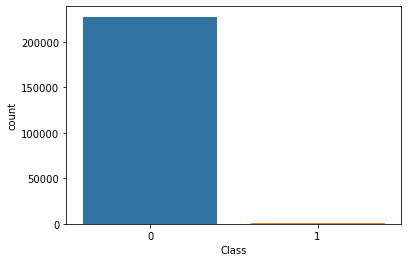

In [11]:
sns.countplot(x = 'Class', data = df)

<AxesSubplot:>

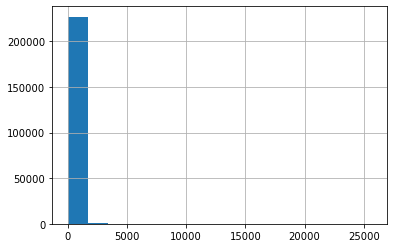

In [12]:
#histogram for the amount 
df['Amount'].hist(bins = 15)

In [13]:
df['Amount'] = np.log(df['Amount'] + 1)

In [14]:
x_test['Amount'] = np.log(x_test['Amount'] + 1)

<ipython-input-14-053d9e141b59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Amount'] = np.log(x_test['Amount'] + 1)


<AxesSubplot:>

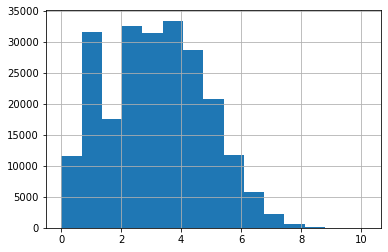

In [15]:
df['Amount'].hist(bins = 15)

In [16]:
#making a model for the data as it is 
X = df.drop('Class',1)
y = df['Class']

In [17]:
#we are going to use random forest for this classification problem 
clf = RandomForestClassifier()

In [18]:
def classification (model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('================================================================================')
    print('Test accuracy full data : ',metrics.accuracy_score(y_test,y_pred))
    print('================================================================================')
    print('The classification report for the full data \n')
    print(metrics.classification_report(y_test,y_pred))
    print('================================================================================')
    print('The area under the curve for the full data: ', metrics.roc_auc_score(y_test,y_pred))
    print('================================================================================')
    print('Confusion matrix: \n',metrics.confusion_matrix(y_test,y_pred))
    print('================================================================================')
    metrics.plot_confusion_matrix(model,x_test,y_test,values_format = 'd',display_labels = ['No Fraud','Fraud'])
    print('================================================================================')

Test accuracy full data :  0.9995786664794073
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The area under the curve for the full data:  0.8877375162220206
Confusion matrix: 
 [[56862     2]
 [   22    76]]


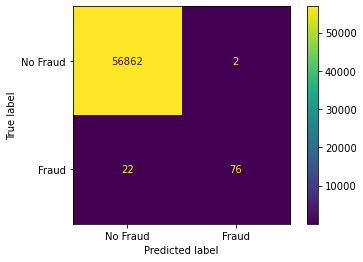

In [19]:
classification(clf,X,x_test,y,y_test)

In [20]:
#here we have a 75% recall for the fraud class and AUC of 87.3% which means that there is some room for improvement

In [21]:
#now we are going to use the feature importance method on the columns to determine if there are some features that we can drop 
feature_importance = pd.DataFrame(clf.feature_importances_,index = X.columns,columns = ['Importance'])

<AxesSubplot:>

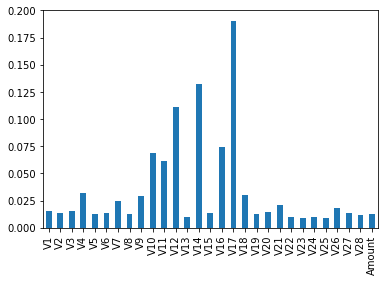

In [22]:
feature_importance['Importance'].plot.bar()

In [23]:
feature_importance = feature_importance[feature_importance['Importance'] >= 0.02]

In [24]:
cols = list(feature_importance.index)
print(cols)

['V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21']


In [25]:
X_fi_rf = X[cols]

In [26]:
x_test_fi = x_test[cols]

In [27]:
clf_rf = RandomForestClassifier()

Test accuracy full data :  0.9996137776061234
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The area under the curve for the full data:  0.892848349947745
Confusion matrix: 
 [[56863     1]
 [   21    77]]


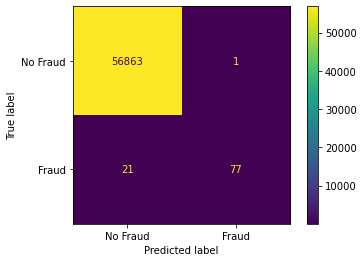

In [28]:
classification(clf_rf,X_fi_rf,x_test_fi,y,y_test)

In [29]:
#oversampling using smote 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_new,y_new = sm.fit_resample(X,y)

In [30]:
y_new.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [31]:
#training after oversampling 
clf_ov = RandomForestClassifier()

Test accuracy full data :  0.9995786664794073
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The area under the curve for the full data:  0.9284834994774501
Confusion matrix: 
 [[56854    10]
 [   14    84]]


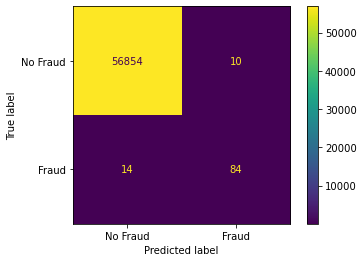

In [33]:
classification(clf_ov,X_new,x_test,y_new,y_test)

<AxesSubplot:>

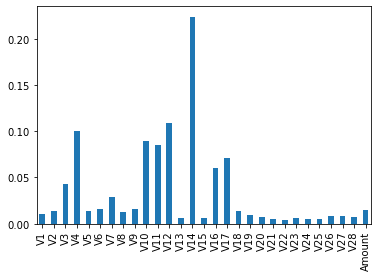

In [34]:
#feature importance after over sampling 
feature_importance = pd.DataFrame(clf_ov.feature_importances_,index = X.columns,columns = ['Importance'])
feature_importance['Importance'].plot.bar()

In [35]:
feature_importance = feature_importance[feature_importance['Importance'] >= 0.02]
cols = list(feature_importance.index)
print(cols)

['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [36]:
x_new_os = X_new[cols]
x_test_os = x_test[cols]

Test accuracy full data :  0.9991748885221726
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.88      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

The area under the curve for the full data:  0.9384677583751564
Confusion matrix: 
 [[56829    35]
 [   12    86]]


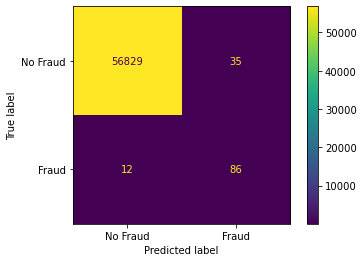

In [37]:
classification(clf_ov,x_new_os,x_test_os,y_new,y_test)

In [38]:
#now lets try undersampling
#first we split the 0s and 1s 
zeros = df[df['Class'] == 0]
ones = df[df['Class'] == 1]
print(len(zeros))
print(len(ones))

227451
394


In [39]:
zeros_undersampled = resample(zeros,n_samples = 378,random_state = 42)

In [40]:
re_merged_df = pd.concat([zeros_undersampled,ones],0)

In [41]:
x_train_u = re_merged_df.drop('Class',1)
y_train_u = re_merged_df['Class']

In [63]:
clf_u = RandomForestClassifier()

Test accuracy full data :  0.9762122116498718
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

The area under the curve for the full data:  0.9575261203243257
Confusion matrix: 
 [[55515  1349]
 [    6    92]]


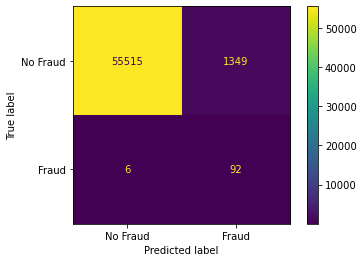

In [64]:
classification(clf_u,x_train_u,x_test,y_train_u,y_test)

In [65]:
#we are going to try to down sample the class 0 then oversample the class 1 
zeros_undersampled2 = resample(zeros,n_samples = 75000,random_state = 42)

In [66]:
df_under_over = pd.concat([zeros_undersampled2,ones],0)

In [67]:
x_under_over = df_under_over.drop('Class',1)
y_under_over = df_under_over['Class']

In [68]:
X_new2,y_new2= sm.fit_resample(x_under_over,y_under_over)

In [69]:
print(X_new2.shape,y_new2.shape)

(150000, 29) (150000,)


In [74]:
clf_under_over = RandomForestClassifier()

Test accuracy full data :  0.9993679997191109
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.88      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

The area under the curve for the full data:  0.9385644803785329
Confusion matrix: 
 [[56840    24]
 [   12    86]]


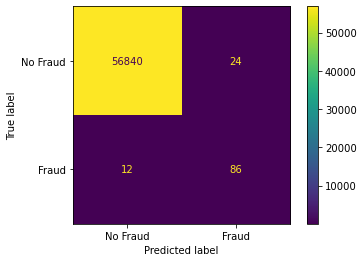

In [75]:
classification(clf_under_over,X_new2,x_test,y_new2,y_test)

In [51]:
#now we are going to remove the outliers from the data then redo the classification again

In [52]:
#first we are going to split the no fraud data and the fraud data (remove the outliers from the no fraud data only since the data is heavily unbalanced and 
#we need all the 1s)
no_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [53]:
print('Fraud shape: ', fraud.shape, '\nNo fraud shape: ', no_fraud.shape)

Fraud shape:  (394, 30) 
No fraud shape:  (227451, 30)


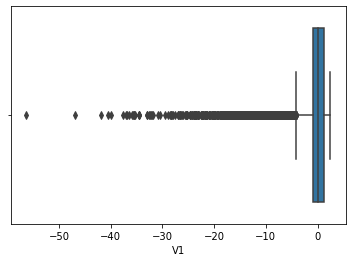

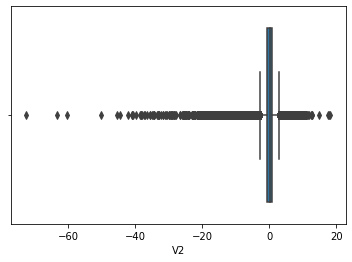

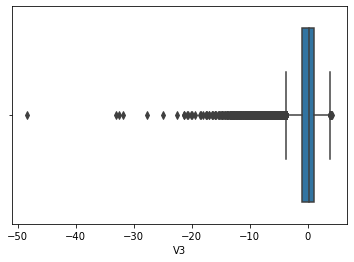

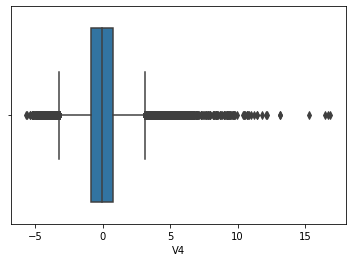

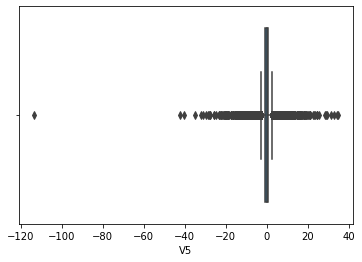

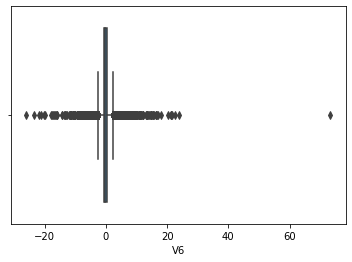

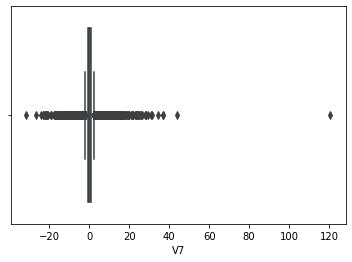

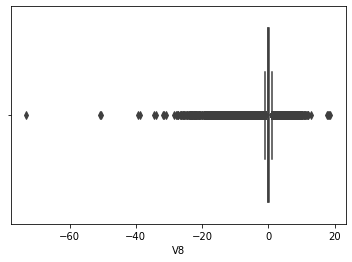

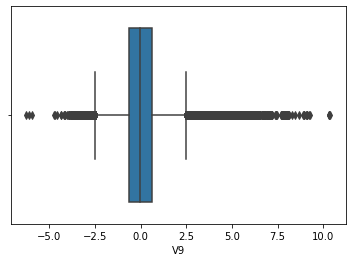

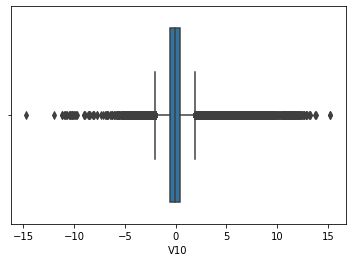

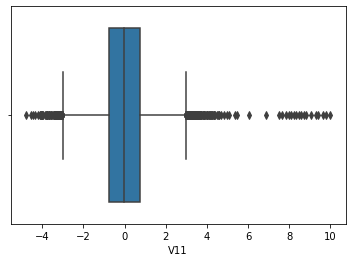

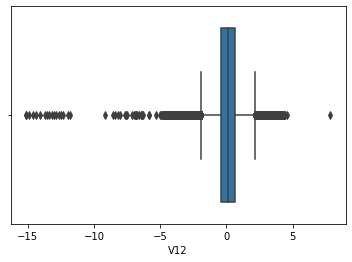

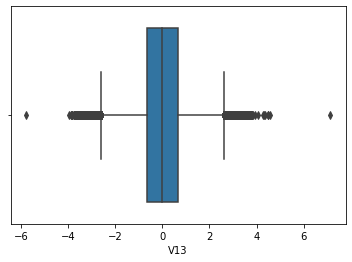

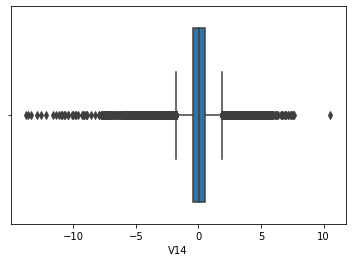

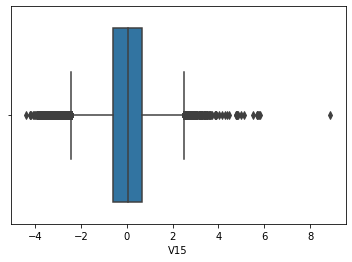

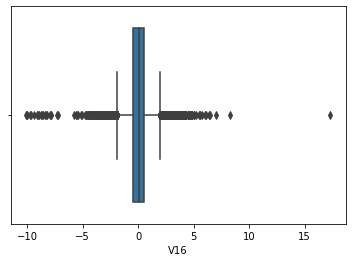

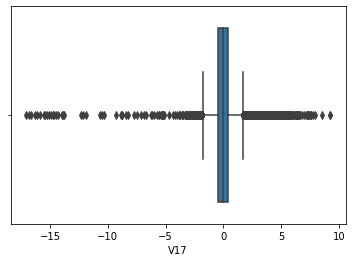

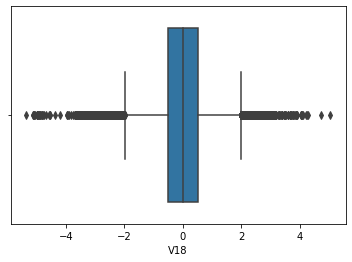

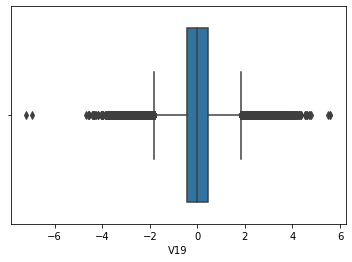

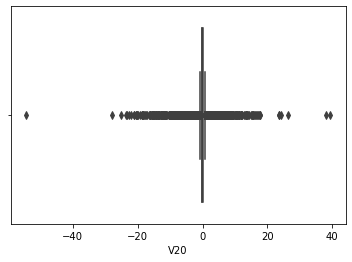

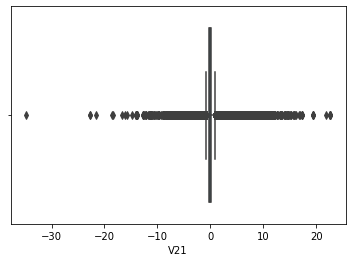

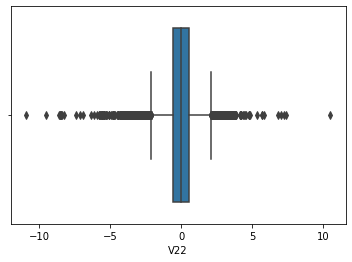

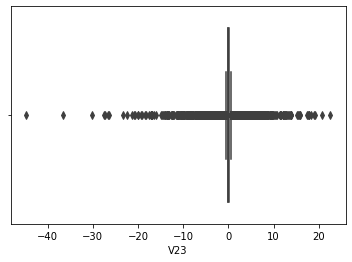

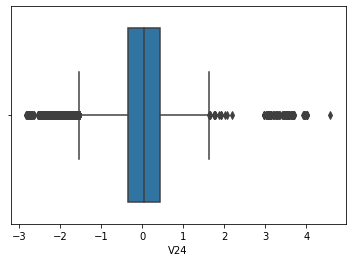

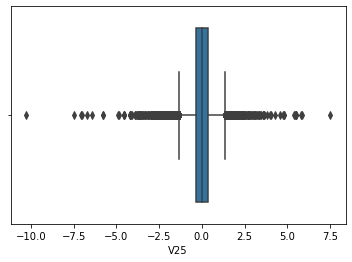

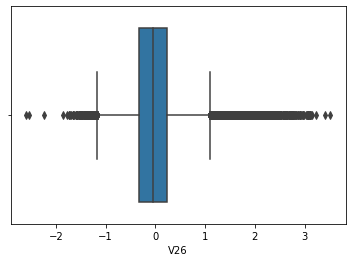

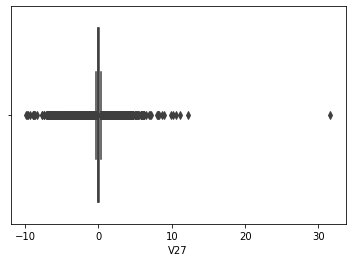

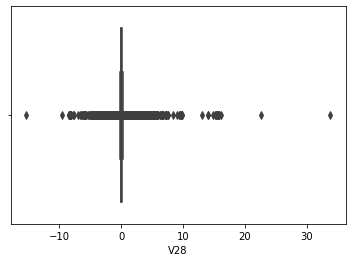

In [55]:
#printing a boxplot for V1 : V28 features of the no-fraud data (class 0 )
for i in no_fraud.drop(['Class','Amount'],1).columns:
    sns.boxplot(x = i, data = no_fraud)
    plt.show()

In [57]:
#we can see that there are alot of outliers is different columns so we are going to drop the outliers outside of 3 standard deviation of every column 
abs_z_scores = np.abs(no_fraud.drop(['Amount','Class'],1))
filtered_entries = (abs_z_scores < 3).all(axis=1)
no_fraud = no_fraud[filtered_entries]

In [58]:
print('Shape of no_fraud data after dropping all the outliers', no_fraud.shape)

Shape of no_fraud data after dropping all the outliers (182543, 30)


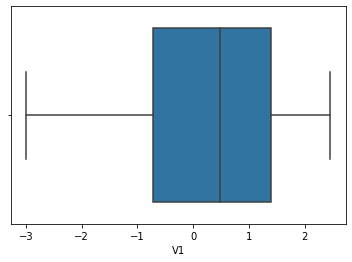

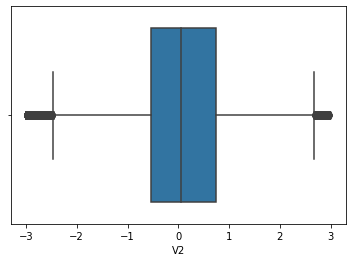

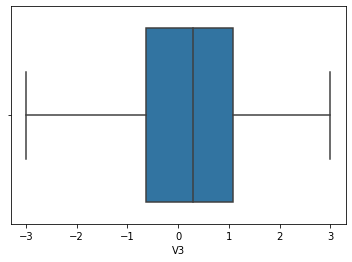

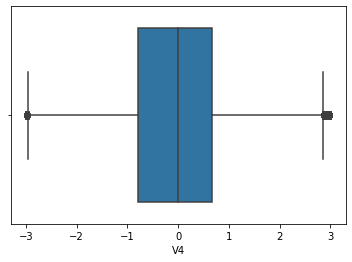

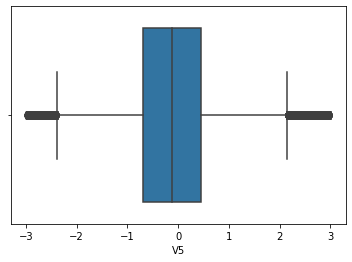

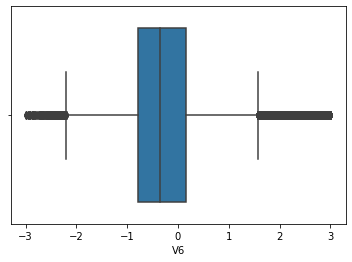

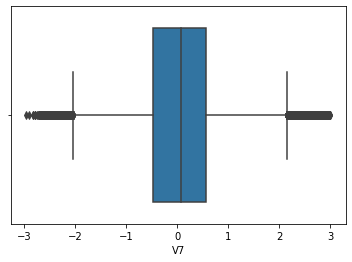

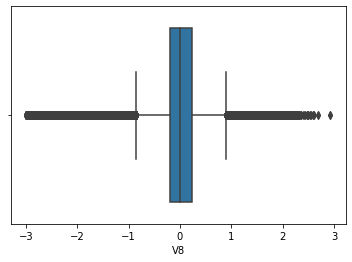

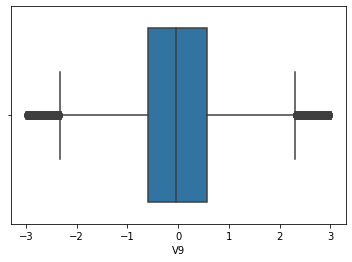

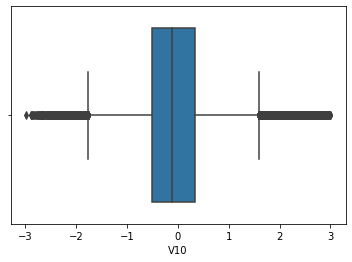

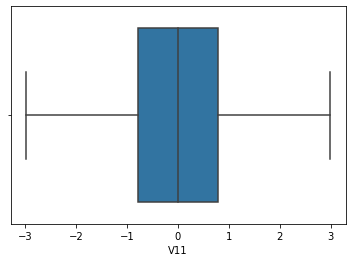

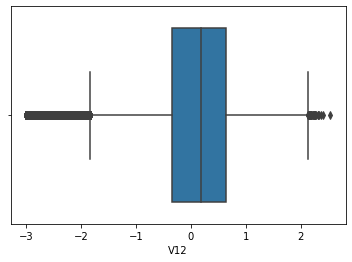

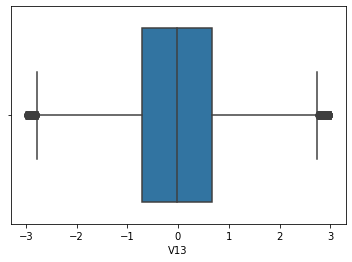

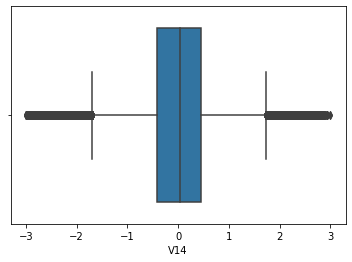

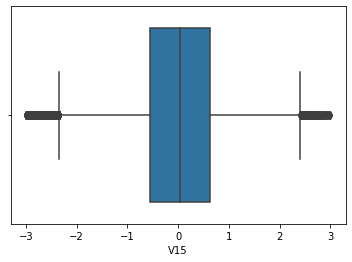

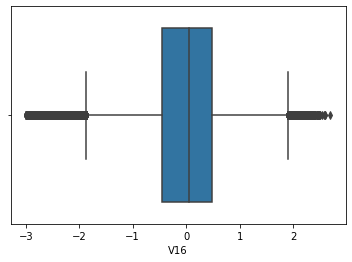

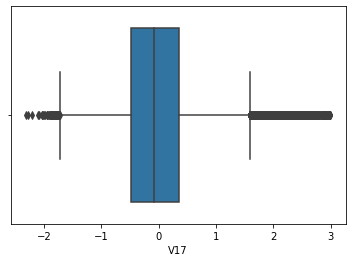

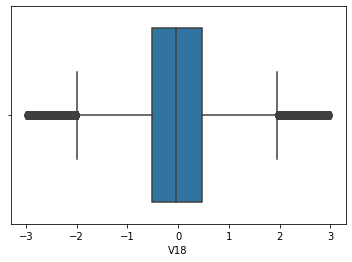

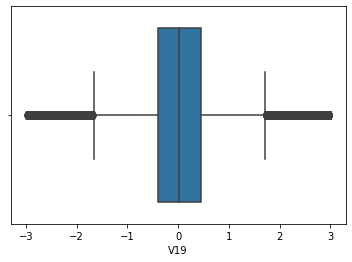

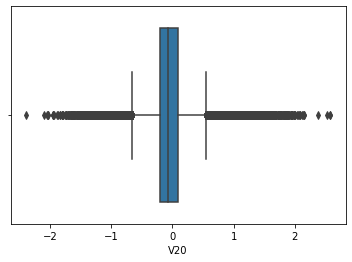

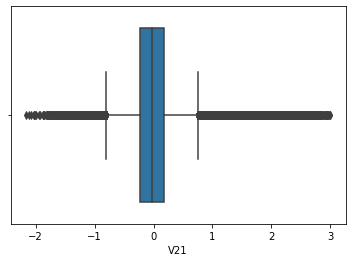

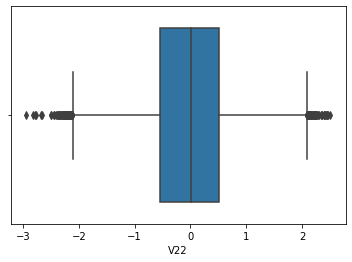

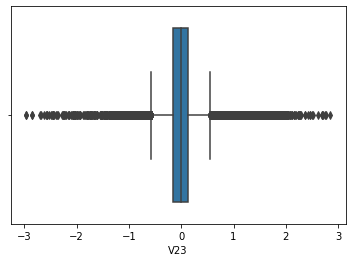

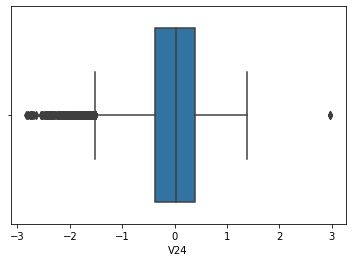

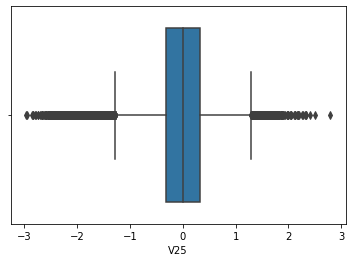

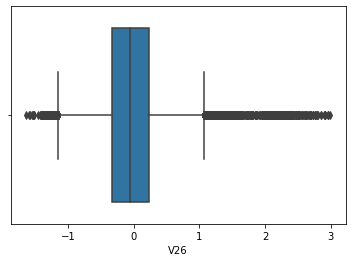

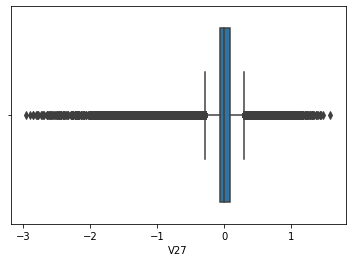

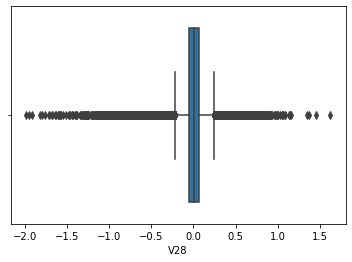

In [59]:
#ploting box plots again for the V1:V28 columns after removing the outliers 
for i in no_fraud.drop(['Class','Amount'],1).columns:
    sns.boxplot(x = i, data = no_fraud)
    plt.show()

In [60]:
# we can see that the data for each column looks abit better after  removing the outliers, no we are going to merge the columns again 
df_no_outliers = pd.concat([fraud,no_fraud],0)

In [61]:
#now we are going to split the data again and train the model and see if it improves 
X_no = df_no_outliers.drop('Class',1)
y_no = df_no_outliers['Class']

In [76]:
clf_no_out = RandomForestClassifier()

Test accuracy full data :  0.9156104069379586
The classification report for the full data 

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.88      0.03        98

    accuracy                           0.92     56962
   macro avg       0.51      0.90      0.50     56962
weighted avg       1.00      0.92      0.95     56962

The area under the curve for the full data:  0.8966135096413353
Confusion matrix: 
 [[52069  4795]
 [   12    86]]


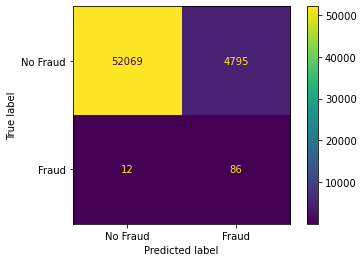

In [77]:
classification(clf_no_out,X_no,x_test,y_no,y_test)

In [78]:
'''
In conclusion:
we used the random forest with many version of the data:
we tried with the full test data and got precision of  0.97 for the 1 class, a recall of  0.78 for the 1 class, and an AUC of 
0.887 then we used the feature importance attribute to select the most important features and redid the model, and got a
precision of 0.99 for the 1 class and a recall of 0.79 for the 1 class and an AUC of 0.892. then we tried another approach by
using the SMOTE function in the imblearn library to get more values for the 1 class to balance the data, then belt a model for
the new data set and got a precision of 0.89 for the 1 class, a recall of 0.86 and an AUC of 0.928, then we tried the feature
importance attribute on this model and redid the model and go 0.71 precision for the 1 class, recall fof 0.88 for the one class
and an AUC of 0.938. then we tried undersampling by taking a random amount of rows from the 0 class equal to the number of rows
to the 1 class and redid the model and got 0.06 precision, 0.94 reclass for the 1 class and an AUC of 0.957. then we tried 
undersampling the 0 class to 75000 and oversample the 1 class to match that number and redid the model and got a precision of 
0.78 and a recall of 0.88 for the 1 class and an AUC of 0.938, and finally we tried removing the outliers from each column and 
redid the model and go 0.02 precision, 0.88 recall for the 1 class and an AUC of 0.8966
'''
